In [1]:
from matplotlib import pyplot as plt
import matplotlib as mpl
from matplotlib import colormaps
from matplotlib.colors import ListedColormap
import numpy as np
%matplotlib inline

In [2]:
def get_nearest_idx(val, arr):
    return np.abs((arr - val)).argmin()

In [3]:
warm = colormaps.get_cmap('autumn')(np.linspace(0,1,128))[::-1]
cool = colormaps.get_cmap('cool')(np.linspace(0,1,128))[::-1]
cool[:, 0] = 0
cmap = afni_rdbu = ListedColormap(np.vstack([cool, warm]))

In [22]:
def alpha_boxed_cbar(min, max, thr, nthr=None, cmap=None, twosided=False, path=None):
    """Generate a colorbar suitable for use with an afni alpha-boxed colormap.
    The generated colorbar will depict the transparency and portion of the
    colormap that is outlined.

    Parameters
    ==========
    min : float
        Minimum value to depict on the colorbar. Should be less than max.
    max : float
        Maximum value to depict on the colorbar
    thr : float
        Threshold for outlining values and 0 transparency. If twosided,
        this is the positive threshold. Must be between min and max.
    nthr : float
        Negative threshold for twosided colorbar. If not twosided, then
        this has no effect. If twosided and not defined, defaults to 
        -thr. Must be between min and max and less than thr.
    cmap : str | matplotlib.colors.ListedColormap
        Colormap to use
    twosided : bool
        If true, create a twosided color bar.
    path : str
        Path to write png to. If none, then no files written.

    Returns
    =======
    path : str  | None
        path colorbar was written to.
    
    """
    if min >= max:
        raise ValueError("min should be less than max")
    if thr <= min or thr >= max:
        raise ValueError("thr should be between min and max")
    if cmap is None:
        cmap = "plasma"
    if twosided and (nthr is None):
        nthr = -thr
    if nthr is not None:
        if (nthr <= min) or (nthr >= max):
            raise ValueError("nthr should be between min and max")
        if nthr >= thr:
            raise ValueError("nthr should be less than thr")
    if not isinstance(cmap, ListedColormap):
        cmap = mpl.colormaps[cmap]
    nrows = 1
    figh = 0.35 + 0.15 + (nrows + (nrows - 1) * 0.1) * 0.22
    figh = figh / 2
    
    ncolors = len(cmap.colors)
    gradient = np.linspace(min,max, ncolors)
    alpha = np.ones(gradient.shape)
    idxs = np.arange(len(gradient))
    if twosided:
        # in the two sided case need to know midpoint
        # that's where we'll have alpha at 0
        zval = ((thr - nthr) / 2) + nthr
        z_idx = get_nearest_idx(zval, gradient)
        nthr_idx = get_nearest_idx(nthr, gradient)
        thr_idx = get_nearest_idx(thr, gradient)
        nramp = idxs[(idxs > nthr_idx) & (idxs <= z_idx)]
        alpha[(idxs > nthr_idx) & (idxs <= z_idx)] = (((nramp - nramp.min())/(nramp.max() - nramp.min()))**2)[::-1]
        
        ramp = idxs[(idxs >= z_idx) & (idxs < thr_idx)]
        alpha[(idxs >= z_idx) & (idxs < thr_idx)] = (((ramp - ramp.min())/(ramp.max() - ramp.min()))**2)
    
    else:
        z_idx =  get_nearest_idx(min, gradient)
        thr_idx = get_nearest_idx(thr, gradient)
        ramp = idxs[(idxs >= z_idx) & (idxs < thr_idx)]
        alpha[(idxs >= z_idx) & (idxs < thr_idx)] = (((ramp - ramp.min())/(ramp.max() - ramp.min()))**2)
    
    alpha = np.vstack([alpha, alpha])
    
    nboxes = 2 * 6.4 / figh
    boxes = []
    while len(boxes) < ncolors:
        boxes.extend(([0] * int(ncolors/ nboxes) + [1] * int(ncolors/ nboxes)))
    lboxes = np.abs(np.array(boxes) - 1)
    boxes = np.vstack([boxes, lboxes])[:, :ncolors]
    
    # make the gradient 2 high so the imshow works
    # but do it after everything that depends on it being 1 row has been done
    gradient = np.vstack((gradient, gradient))
    
    fig, ax = plt.subplots(nrows=nrows, figsize=(6.4, figh))
    # plot boxes first so there's a checkerboard behind the colors
    ax.imshow(boxes, aspect='auto', cmap='Greys', interpolation='nearest')
    ax.imshow(gradient, aspect='auto', cmap=cmap)
    cmapimg = ax.get_images()[1]
    # set alpha to match the quadratic decat
    cmapimg.set_alpha(alpha)
    _ = ax.set_yticks([])
    _ = ax.set_xticklabels([])
    
    ymin, ymax = ax.get_ylim()
    xmin, xmax = ax.get_xlim()
    # draw lines to indicte which part of the colorbar is outline on the figure
    if twosided:
        ax.vlines([nthr_idx, thr_idx], ymax, ymin, lw=2, color='black')
        ax.vlines([xmax, xmin], ymax, ymin, lw=5, color='black')
        ax.hlines([ymin, ymax], thr_idx, xmax, lw=5, color='black')
        ax.hlines([ymin, ymax], nthr_idx, xmin, lw=5, color='black')
    else:
        ax.vlines([thr_idx], ymax, ymin, lw=2, color='black')
        ax.vlines([xmax], ymax, ymin, lw=5, color='black')
        ax.hlines([ymin, ymax], thr_idx, xmax, lw=5, color='black')
    if path is not None:
        fig.savefig(path)
    return path

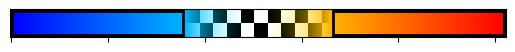

In [23]:
min = -10.876173
max = 10.876173
thr = 3.3143
twosided = True
alpha_boxed_cbar(min, max, thr, cmap=afni_rdbu, twosided=twosided)

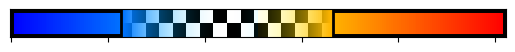

In [24]:
min = -10.876173
max = 10.876173
thr = 3.3143
nthr = -6
twosided = True
alpha_boxed_cbar(min, max, thr, nthr, cmap=afni_rdbu, twosided=twosided)

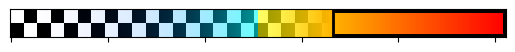

In [25]:
min = -10.876173
max = 10.876173
thr = 3.3143
twosided = False
alpha_boxed_cbar(min, max, thr, cmap=afni_rdbu, twosided=twosided)

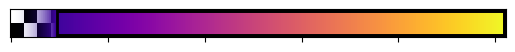

In [27]:
min = 0
max = 251.146927
thr = 23.666248
cmap = 'plasma'
alpha_boxed_cbar(min, max, thr, cmap=cmap, twosided=twosided)